## Etudiante: GIANG Phuong Thu, Cécile (3530406)

In [1]:
import numpy as np

# MAPSI - TME  - Rappels de Proba/stats

## I- La planche de Galton (<font color="red"> obligatoire</font>)

### I.1- Loi de Bernouilli
Écrire une fonction `bernouilli: float ->int` qui prend en argument le paramètre $p \in [0,1]$ et qui renvoie aléatoirement $0$ (avec la probabilité $1-p$) ou $1$ (avec la probabilité $p$).

In [2]:
def bernouilli(p):
    """ Loi de Bernoulli de paramètre p.
        @param p: float, probabilité de succès
        @return: int, 1 si succès, 0 si échec
    """
    if np.random.random()<p:
        return 1
    return 0

### I.2- Loi binomiale
Écrire une fonction `binomiale: int , float -> int` qui prend en argument un entier $n$ et $p \in [0,1]$ et qui renvoie aléatoirement un nombre tiré selon la distribution ${\cal B}(n,p)$.

In [3]:
def binomiale(n,p):
    """ Loi binomiale de paramètres n et p.
    @param n: int, nombre d'épreuves de Bernoulli
    @param p: float, probabilité de succès d'une épreuve de Bernoulli
    @return cpt: int, nombre de succès des épreuves de Bernoulli
    """
    cpt = 0
    for i in range(n):
        cpt += bernouilli(p)
    return cpt

### I.3- Histogramme de la loi binomiale
<img src="tme2_Galton.jpg" title="Planche de Galton" style="float: right;">

Dans cette question, on considère une planche de Galton de hauteur $n$. On rappelle que des bâtons horizontaux (oranges) sont cloués à cette planche comme le montre la figure ci-contre. 

 Des billes bleues tombent du haut de la planche et, à chaque niveau, se retrouvent à la verticale d'un des bâtons. Elles vont alors tomber soit à gauche, soit à droite du bâton, jusqu'à atteindre le bas de la planche. Ce dernier est constitué de petites boites dont les bords sont symbolisés par les lignes verticales grises. 
 
Chaque boite renferme des billes qui sont passées exactement le même nombre de fois à droite des bâtons oranges. Par exemple, la boite la plus à gauche renferme les billes qui ne sont jamais passées à droite d'un bâton, celle juste à sa droite renferme les billes passées une seule fois à droite d'un bâton et toutes les autres fois à gauche, et ainsi de suite. 

La répartition des billes dans les boites suit donc une loi binomiale ${\cal B}(n,0.5)$. 

Écrire un script qui crée un tableau de $1000$ cases dont le contenu correspond à $1000$ instanciations de la loi binomiale ${\cal B}(n,0.5)$. Afin de voir la répartition des billes dans la planche de Galton, tracer l'histogramme de ce tableau. Vous pourrez utiliser la fonction hist de matplotlib.pyplot: 

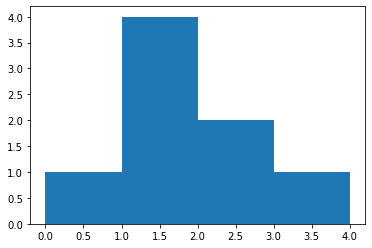

In [30]:
import matplotlib.pyplot as plt

plt.hist ([0,1,2,1,2,4,1,1], 4);

Pour le nombre de bins, calculez le nombre de valeurs différentes dans votre tableau.

(array([  1.,  22.,  52., 130., 203., 231., 179., 103.,  56.,  21.,   2.]),
 array([ 1.        ,  1.90909091,  2.81818182,  3.72727273,  4.63636364,
         5.54545455,  6.45454545,  7.36363636,  8.27272727,  9.18181818,
        10.09090909, 11.        ]),
 <a list of 11 Patch objects>)

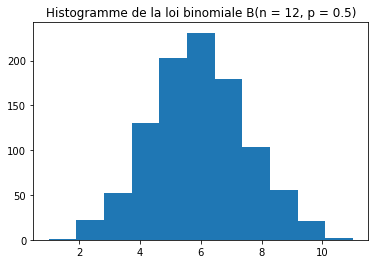

In [51]:
# Dans notre modélisation de la planche de Galton, on considèrera que la v.a aléatoire X correspondant au numéro de la boîte
# dans laquelle une bille se retrouve suit une loi binomiale de paramètres n (n = hauteur-1) et p (la probabilité de succès,
# i.e. la probabilité que la bille tombe à droite d'un bâton).

# ------- Construction du tableau des 1000 instances de la loi binomiale B(n, p = 0.5)
n = 12
p = 0.5
X = []

for i in range(1000):
    X.append(binomiale(n,p))
    
# ------- Construction de l'histogramme correspondant

# On fixe le paramètre bins au nombre de valeurs différentes dans le tableau X
values, count = np.unique(X, return_counts=True)
bins = len(values)

# On affiche l'histogramme de X
plt.title('Histogramme de la loi binomiale B(n = 12, p = 0.5)')
plt.hist(X, bins)

## II- Visualisation d'indépendances (<font color="red"> obligatoire</font>)

### II.1- Loi normale centrée réduite
<img src="tme2_normale.jpg" title="Planche de Galton" style="float: right;">

On souhaite visualiser la fonction de densité de la loi normale. Pour cela, on va créer un ensemble de $k$ points $(x_i,y_i$), pour des $x_i$ équi-espacés variant de $-2σ$ à $2σ$, les $y_i$ correspondant à la valeur de la fonction de densité de la loi normale centrée de variance $σ^2$, autrement dit ${\cal N}(0,σ^2)$.

Écrire une fonction `normale : int , float -> float np.array` qui, étant donné un paramètre entier `k` impair et un paramètre réel `sigma` renvoie l'`array numpy` des $k$ valeurs $y_i$. Afin que l'`array numpy` soit bien symmétrique, on lèvera une exception si $k$ est pair.

In [4]:
np.linspace(0,1,10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [5]:
def normale (k, sigma):
    """ Loi normale de paramètres mu et sigma.
        @param k: int, nombre impairs de valeurs distinctes de yi (nombre de points)
        @param sigma: float, écart-type de la loi normale N(mu, sigma²)
        @return Yi: float np.array, tableau des k valeurs yi
    """
    # On lève une exception si k est pair
    if k%2 == 0:
        raise ValueError('Le paramètre k doit être impair.')
        
    # On construit d'abord le tableau des k valeurs xi, équi-espacés entre -2*sigma et 2*sigma
    Xi = np.linspace(-2*sigma, 2*sigma, k)
    
    # On construit le tableau des k valeurs yi correspondants à la densité de la loi N(0, sigma²) en xi
    mu = 0
    Yi = np.exp(-((Xi-mu)**2)/(2*(sigma**2)))/(sigma*np.sqrt(2*np.pi))
    
    return Yi

Vérfier la validité de votre fonction en affichant grâce à la fonction plot les points générés dans une figure. 

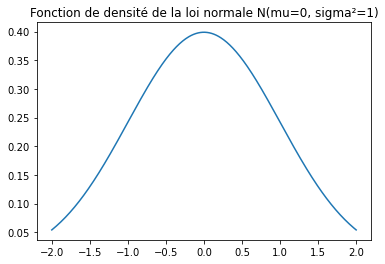

In [52]:
# ------- Affichage de la fonction de densité de la loi normale N(0, sigma²)

sigma = 1
k = 401
Xi = np.linspace(-2*sigma, 2*sigma, k)
Yi = normale(k, sigma)

plt.title('Fonction de densité de la loi normale N(mu=0, sigma²=1)')
plt.plot(Xi, Yi)

### II.2- Distribution de probabilité affine
<img src="tme2_lineaire.jpg" title="Distribution affine" style="float: right;">

Dans cette question, on considère une généralisation de la distribution uniforme: une distribution affine, c'est-à-dire que la fonction de densité est une droite, mais pas forcément horizontale, comme le montre la figure ci-contre. 

Écrire une fonction `proba_affine : int , float -> float np.array` qui, comme dans la question précédente, va générer un ensemble de $k$ points $y_i, i=0,...,k−1$, représentant cette distribution (paramétrée par sa pente `slope`). On vérifiera ici aussi que l'entier $k$ est impair. Si la pente est égale à $0$, c'est-à-dire si la distribution est uniforme, chaque point $y_i$ devrait être égal à $\frac{1}{k}$ (afin que $\sum y_i=1$). Si la pente est différente de $0$, il suffit de choisir, $\forall i=0,...,k−1$,

$$y_i=\frac{1}{k}+(i−\frac{k−1}{2})×slope$$

Vous pourrez aisément vérifier que, ici aussi, $\sum y_i=1$. Afin que la distribution soit toujours positive (c'est quand même un minimum pour une distribution de probabilité), il faut que la pente slope ne soit ni trop grande ni trop petite. Le bout de code ci-dessous lèvera une exception si la pente est trop élevée et indiquera la pente maximale possible. 

In [6]:
def proba_affine(k, slope):
    """ Modélisation d'une distribution de probabilités affine, i.e. la fonction de densité est une droite.
        @param k: int, nombre impairs de points (nombre de valeurs de yi)
        @param slope: float, pente de la distribution affine
        @return Yi: float np.array, tableau des k valeurs de yi
    """
    # On lève une exception si k est pair
    if k%2 == 0:
        raise ValueError('Le paramètre k doit être impair.')
    
    # On lève une exception si la pente slope de la distribution est trop grande ou trop petite.
    if abs(slope) > 2. / (k*k):
        raise ValueError('La pente est trop raide : pente max = ' +
        str(2. / (k*k)))
    
    # On construit d'abord le tableau des k valeurs xi, équi-espacés entre 0 et k-1
    Xi = np.linspace(0, k-1, k)
    
    # On construit le tableau des k valeurs yi correspondants.
    # Si la pente slope est égale à 0, la distribution est uniforme. Elle est affine sinon.
    
    # -- Cas slope = 0 (distribution uniforme)
    if slope == 0:
        Yi = [1./k for xi in Xi]
    
    # -- Cas slope > 0 (distribution affine)
    else:
        Yi = [1./k + (xi - (k-1)/2.)*slope for xi in Xi]
    
    return Yi

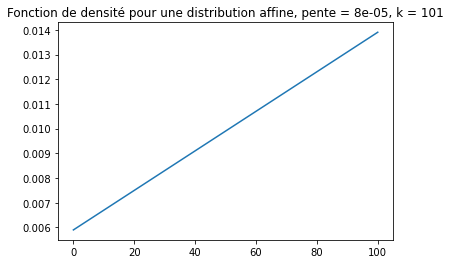

In [58]:
# ------- Affichage de la fonction de densité pour une distribution affine

k = 101
slope = 0.00008

Xi = np.linspace(0, k-1, k)
Yi = proba_affine(k, slope)

plt.title('Fonction de densité pour une distribution affine, pente = ' + str(slope) + ', k = ' + str(k))
plt.plot(Xi,Yi)

### II.3- Distribution jointe
Écrire une fonction `Pxy : float np.array , float np.array -> float np.2D-array` qui, étant donné deux tableaux numpy de nombres réels à $1$ dimension générés par les fonctions des questions précédentes et représentant deux distributions de probabilités $P(A)$ et $P(B)$, renvoie la distribution jointe $P(A,B)$ sous forme d'un tableau numpy à $2$ dimensions de nombres réels, en supposant que $A$ et $B$ sont des variables aléatoires indépendantes. Par exemple, si:

In [7]:
PA = np.array ( [0.2, 0.7, 0.1] )
PB = np.array ( [0.4, 0.4, 0.2] )

alors `Pxy(A,B)` renverra le tableau :
```
np.array([[ 0.08,  0.08,  0.04],
          [ 0.28,  0.28,  0.14],
          [ 0.04,  0.04,  0.02]])
```

In [8]:
def Pxy(X,Y):
    """
    Renvoie la distribution jointe P(X,Y) à partir des lois P(X) et P(Y), en supposant les v.a. X et Y indépendantes.
    @param X: float np.array, distribution de la v.a. X
    @param Y: float np.array, distribution de la v.a. Y
    @return: float np.2d-array, distribution jointe P(X,Y)
    """
    return np.vstack(X)*Y

In [9]:
# ------- Distribution jointe de PA et PB
Pxy(PA,PB)

array([[0.08, 0.08, 0.04],
       [0.28, 0.28, 0.14],
       [0.04, 0.04, 0.02]])

### II.4- Affichage de la distribution jointe
<img src="tme2_jointe.jpg" title="Distribution jointe" style="float: right;">

Le code ci-dessous permet d'afficher en 3D une probabilité jointe générée par la fonction précédente. Exécutez-le avec une probabilité jointe résultant de la combinaison d'une loi normale et d'une distribution affine. 

Si la commande `%matplotlib notebook` fonctionne, vous pouvez interagir avec la courbe. Si le contenu de la fenêtre est vide, redimensionnez celle-ci et le contenu devrait apparaître. Cliquez à la souris à l'intérieur de la fenêtre et bougez la souris en gardant le bouton appuyé afin de faire pivoter la courbe. Observez sous différents angles cette courbe. Refaites l'expérience avec une probabilité jointe résultant de deux lois normales. Essayez de comprendre ce que signifie, visuellement, l'indépendance probabiliste. Vous pouvez également recommencer l'expérience avec le logarithme des lois jointes.


In [10]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline  
# essayer `%matplotib notebook` pour interagir avec la visualisation 3D

def dessine ( P_jointe ):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = np.linspace ( -3, 3, P_jointe.shape[0] )
    y = np.linspace ( -3, 3, P_jointe.shape[1] )
    X, Y = np.meshgrid(x, y)
    ax.plot_surface(X, Y, P_jointe, rstride=1, cstride=1 )
    ax.set_xlabel('A')
    ax.set_ylabel('B')
    ax.set_zlabel('P(A) * P(B)')
    plt.show ()

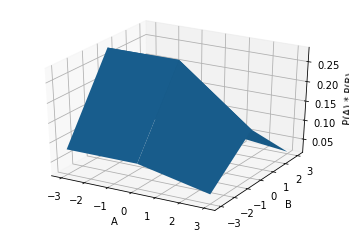

In [74]:
dessine(np.array([[ 0.08,  0.08,  0.04],
                  [ 0.28,  0.28,  0.14],
                  [ 0.04,  0.04,  0.02]]))

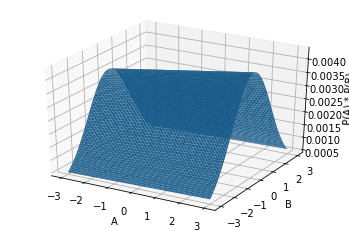

In [79]:
# Affichage de la distribution jointe entre une loi normale et une distribution affine

k = 101
sigma = 1
slope = 0.00002

dessine(Pxy(normale(k,sigma), proba_affine(k,slope)))

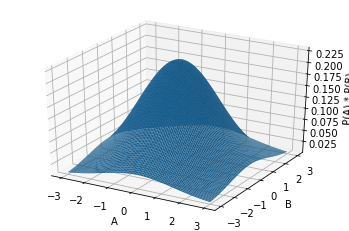

In [82]:
# Affichage de la distribution jointe entre deux lois normales

k = 101
sigma_1 = 1
sigma_2 = 0.7

dessine(Pxy(normale(k,sigma_1), normale(k,sigma_2)))

## III- Indépendances conditionnelles (<font color="red"> obligatoire</font>)

Dans cet exercice, on considère quatre variables aléatoires booléennes $X$, $Y$, $Z$ et $T$ ainsi que leur distribution jointe $P(X,Y,Z,T)$ encodée en python de la manière suivante : 

In [11]:
# creation de P(X,Y,Z,T)
P_XYZT = np.array([[[[ 0.0192,  0.1728],      # X=0,Y=0,Z=0,T=0 et 1
                     [ 0.0384,  0.0096]],     # X=0,Y=0,Z=1,T=0 et 1

                    [[ 0.0768,  0.0512],      # X=0,Y=1,Z=0,T=0 et 1
                     [ 0.016 ,  0.016 ]]],    # X=0,Y=1,Z=1,T=0 et 1

                   [[[ 0.0144,  0.1296],      # X=1,Y=0,Z=0,T=0 et 1
                     [ 0.0288,  0.0072]],     # X=1,Y=0,Z=1,T=0 et 1

                    [[ 0.2016,  0.1344],      # X=1,Y=1,Z=0,T=0 et 1
                     [ 0.042 ,  0.042 ]]]])   # X=1,Y=1,Z=1,T=0 et 1

In [12]:
# Notes personnelles:

# P_XYZT = P(X,Y,Z,T) est un tableau de 4 dimensions.
# np.sum(P_XYZT, axis=n) avec n = 0, 1 , 2 ou 3 est un tableau à 3 dimensions

# np.sum(P_XYZT, axis=3) = P(X,Y,Z)
# np.sum(P_XYZT, axis=2) = P(X,Y,T)
# np.sum(P_XYZT, axis=1) = P(X,Z,T)
# np.sum(P_XYZT, axis=0) = P(Y,Z,T)

print(np.sum(P_XYZT, axis=3))
print('\n', 0.0192+0.1728)

[[[0.192 0.048]
  [0.128 0.032]]

 [[0.144 0.036]
  [0.336 0.084]]]

 0.192


Ainsi, $\forall (x,y,z,t) \in \{0,1\}^4$, `P_XYZT[x][y][z][t]` correspond à $P(X=x,Y=y,Z=z,T=t)$ ou, en version abrégée, à $P(x,y,z,t)$. 

### III.1- Indépendance de X et T conditionnellement à (Y,Z)
On souhaite tester si les variables aléatoires $X$ et $T$ sont indépendantes conditionnellement à $(Y,Z)$. Il s'agit donc de vérifer que dans la loi $P$, $$P(X,T|Y,Z)=P(X|Y,Z)\cdot P(T|Y,Z)$$


Pour cela, tout d'abord, calculer à partir de `P_XYZT` le tableau `P_YZ` représentant la distribution $P(Y,Z)$. On rappelle que $$P(Y,Z)=\sum_{X,T} P(X,Y,Z,T)$$

Le tableau `P_YZ` est donc un tableau à deux dimensions, dont la première correspond à $Y$ et la deuxième à $Z$. Si vous ne vous êtes pas trompé(e)s, vous devez obtenir le tableau suivant : 
```
np.array([[ 0.336,  0.084],
          [ 0.464,  0.116]])
```

Ainsi $P(Y=0,Z=1)=$ `P_YZ[0][1]` $=0.084$

In [13]:
# Notes personnelles:
#
# Distribution jointe P(Y,Z):
# P(Y=0, Z=0), P(Y=0, Z=1), P(Y=1, Z=1)
#
# Avec:
#        P(Y=0, Z=0) = P(X=xi, Y=0, Z=0, T=ti) avec (xi, ti) dans {(0,0), (0,1), (1,0), (1,1)}
#        P(Y=0, Z=1) = P(X=xi, Y=0, Z=1, T=ti) avec (xi, ti) dans {(0,0), (0,1), (1,0), (1,1)}
#        P(Y=1, Z=0) = P(X=xi, Y=1, Z=0, T=ti) avec (xi, ti) dans {(0,0), (0,1), (1,0), (1,1)}
#        P(Y=1, Z=1) = P(X=xi, Y=1, Z=1, T=ti) avec (xi, ti) dans {(0,0), (0,1), (1,0), (1,1)}

# ----------------- 1ère implémentation possible:

P_YZ = np.zeros((2,2), dtype=float)

for yi in [0,1]:
    for zi in [0,1]:
        for xi in [0,1]:
            for ti in [0,1]:
                P_YZ[yi][zi] += P_XYZT[xi][yi][zi][ti]

print('P(Y,Z) d\'après la 1ère implémentation : \n\n', P_YZ)

#----------------- 2ème implémentation possible:

P_YZ = np.sum(np.sum(P_XYZT, axis = 3), axis = 0) 
print('\nP(Y,Z) d\'après la 2ème implémentation : \n\n', P_YZ)

P(Y,Z) d'après la 1ère implémentation : 

 [[0.336 0.084]
 [0.464 0.116]]

P(Y,Z) d'après la 2ème implémentation : 

 [[0.336 0.084]
 [0.464 0.116]]


Ensuite, calculer le tableau `P_XTcondYZ` représentant la distribution $P(X,T|Y,Z)$. Ce tableau a donc 4 dimensions, chacune correspondant à une des variables aléatoires. De plus, les valeurs de `P_XTcondYZ` sont obtenues en utilisant la formule des probabilités conditionnelles: $$P(X,T|Y,Z)=\frac{P(X,Y,Z,T)}{P(Y,Z)}$$

In [14]:
# P_XTcondYZ est de même dimension que P_XYZT
P_XTcondYZ = np.zeros_like(P_XYZT)

for xi in range(2):
    for yi in range(2):
        for zi in range(2):
            for ti in range(2):
                P_XTcondYZ[xi][yi][zi][ti] = P_XYZT[xi][yi][zi][ti]/P_YZ[yi][zi]

print('----- Calcul de P(X,T|Y,Z): ----- \n\n', P_XTcondYZ)

----- Calcul de P(X,T|Y,Z): ----- 

 [[[[0.05714286 0.51428571]
   [0.45714286 0.11428571]]

  [[0.16551724 0.11034483]
   [0.13793103 0.13793103]]]


 [[[0.04285714 0.38571429]
   [0.34285714 0.08571429]]

  [[0.43448276 0.28965517]
   [0.36206897 0.36206897]]]]


Calculer à partir de `P_XTcondYZ` les tableaux à 3 dimensions `P_XcondYZ` et `P_TcondYZ` représentant respectivement les distributions $P(X|Y,Z)$ et $P(T|Y,Z)$. On rappelle que $$P(X|Y,Z)=∑_Y P(X,T|Y,Z)$$

In [15]:
# ----------------- Calcul de P_XcondYZ -----------------

P_XcondYZ = np.sum(P_XTcondYZ, axis=3)
print('------- Calcul de P(X|Y,Z) ------- \n\n', P_XcondYZ)

# ----------------- Calcul de P_TcondYZ -----------------

P_TcondYZ = np.sum(P_XTcondYZ, axis=0)
print('\n\n------- Calcul de P(T|Y,Z) ------- \n\n', P_TcondYZ)

------- Calcul de P(X|Y,Z) ------- 

 [[[0.57142857 0.57142857]
  [0.27586207 0.27586207]]

 [[0.42857143 0.42857143]
  [0.72413793 0.72413793]]]


------- Calcul de P(T|Y,Z) ------- 

 [[[0.1 0.9]
  [0.8 0.2]]

 [[0.6 0.4]
  [0.5 0.5]]]


Enfin, tester si $X$ et $T$ sont indépendantes conditionnellement à $(Y,Z)$: si c'est bien le cas, on doit avoir $$P(X,T|Y,Z)=P(X|Y,Z)×P(T|Y,Z)$$ 

In [16]:
# X et T sont indépendantes conditionnellement à Y et Z si:
#            P(X,T|Y,Z) = P(X|Y,Z) * P(T|Y,Z)


# ------- Calcul de P(X|Y,Z) * P(T|Y,Z)
produit = np.dot(P_XcondYZ, P_TcondYZ)

# NOTE: SI L'ON ESSAIE DE TESTER UNE EGALITE EXACTE ENTRE P(X,T|Y,Z) ET PRODUIT, ON OBTIENDRA TOUJOURS FALSE A CAUSE
# DES ERREURS D'ARRONDI. ON CHOISIRA PLUTOT DE TESTER L'EGALITE A UN EPSILON PRES

eps = 0.00000001
print('X et T indépendantes conditionnellement à Y et Z ?: ', P_XTcondYZ - produit < eps)

X et T indépendantes conditionnellement à Y et Z ?:  [[[[ True  True]
   [ True  True]]

  [[ True  True]
   [ True  True]]]


 [[[ True  True]
   [ True  True]]

  [[ True  True]
   [ True  True]]]]


In [17]:
# Donc X et Y sont bien indépendantes conditionnellement à Y et Z.

### III.2- Indépendance de X et (Y,Z)

On souhaite maintenant déterminer si $X$ et $(Y,Z)$ sont indépendantes. Pour cela, commencer par calculer à partir de `P_XYZT` le tableau `P_XYZ` représentant la distribution $P(X,Y,Z)$. 

Ensuite, calculer à partir de `P_XYZ` les tableaux `P_X` et `P_YZ` représentant respectivement les distributions $P(X)$ et $P(Y,Z)$. On rappelle que $$P(X)=∑_Y∑_Z P(X,Y,Z)$$

Si vous ne vous êtes pas trompé(e), P_X doit être égal au tableau suivant : 
```
np.array([ 0.4,  0.6])
```

In [18]:
# ------- Calcul de P_XYZ = P(X,Y,Z) à partir de P_XYZT

P_XYZ = np.sum(P_XYZT, axis=3)

# ------- Calcul de P_X et P_YZ à partir de P_XYZ

P_X = np.sum(np.sum(P_XYZ, axis=2), axis=1)
P_YZ = np.sum(P_XYZ, axis=0)

print('P(X) = ', P_X)

P(X) =  [0.4 0.6]


Enfin, si $X$ et $(Y,Z)$ sont bien indépendantes, on doit avoir $$P(X,Y,Z)=P(X)×P(Y,Z)$$

In [19]:
# X est indépendante de (Y,Z) si P(X,Y,Z) = P(X) * P(Y,Z)

# ------- Calcul du produit P(X) * P(Y,Z)

produit = np.dot(P_X, P_YZ)

# ------- On détermine si X et (Y,Z) sont bien indépendantes

eps = 0.00000001
print('X et (Y,Z) indépendantes ?: \n\n', P_XYZ - produit < eps)

X et (Y,Z) indépendantes ?: 

 [[[ True  True]
  [ True  True]]

 [[ True  True]
  [ True  True]]]


## IV- Indépendances conditionnelles et consommation mémoire  (<font color="red"> obligatoire</font>)

Le but de cet exercice est d'exploiter les probabilités conditionnelles et les indépendances conditionnelles afin de décomposer une probabilité jointe en un produit de "petites probabilités conditionnelles". Cela permet de stocker des probabilités jointes de grandes tailles sur des ordinateurs "standards". Au cours de l'exercice, vous allez donc partir d'une probabilité jointe et, progressivement, construire un programme qui identifie ces indépendances conditionnelles.

Pour simplifier, dans la suite de cet exercice, nous allons considérer un ensemble $X_0,…,X_n$ de variables aléatoires binaires (elles ne peuvent prendre que 2 valeurs : 0 et 1). 

### Simplification du code : utilisation de pyAgrum

Manipuler des probabilités et des opérations sur des probabilités complexes est difficiles avec les outils classiques. La difficulté principale est certainement le problème du mapping entre axe et variable aléatoire. `pyAgrum` propose une gestion de `Potential` qui sont des tableaux multidimensionnels dont les axes sont caractérisés par des variables et sont donc non ambigüs.

Par exemple, après l'initiation du `Potential PABCD` :

In [21]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

X,Y,Z,T=[gum.LabelizedVariable(x,x,2) for x in "XYZT"]
pXYZT=gum.Potential().add(T).add(Z).add(Y).add(X)
pXYZT[:]=[[[[ 0.0192,  0.1728],
            [ 0.0384,  0.0096]],
           [[ 0.0768,  0.0512],
            [ 0.016 ,  0.016 ]]],
          [[[ 0.0144,  0.1296],
            [ 0.0288,  0.0072]],
           [[ 0.2016,  0.1344],
            [ 0.042 ,  0.042 ]]]]

In [23]:
# ------- On affiche le tableau multidimensionnel pXYZT nouvellement créé

pXYZT

(gum::Potential<double>@0x28bfcb0) <T:0|Z:0|Y:0|X:0> :: 0.0192 /<T:1|Z:0|Y:0|X:0> :: 0.1728 /<T:0|Z:1|Y:0|X:0> :: 0.0384 /<T:1|Z:1|Y:0|X:0> :: 0.0096 /<T:0|Z:0|Y:1|X:0> :: 0.0768 /<T:1|Z:0|Y:1|X:0> :: 0.0512 /<T:0|Z:1|Y:1|X:0> :: 0.016 /<T:1|Z:1|Y:1|X:0> :: 0.016 /<T:0|Z:0|Y:0|X:1> :: 0.0144 /<T:1|Z:0|Y:0|X:1> :: 0.1296 /<T:0|Z:1|Y:0|X:1> :: 0.0288 /<T:1|Z:1|Y:0|X:1> :: 0.0072 /<T:0|Z:0|Y:1|X:1> :: 0.2016 /<T:1|Z:0|Y:1|X:1> :: 0.1344 /<T:0|Z:1|Y:1|X:1> :: 0.042 /<T:1|Z:1|Y:1|X:1> :: 0.042

On peut alors utiliser la méthode `margSumOut` qui supprime les variables par sommations: `p.margSumOut(['X','Y'])` correspond à calculer $\sum_{X,Y} p$

La réponse a question III.1 se calcule donc ainsi :

In [25]:
pXT_YZ = pXYZT/pXYZT.margSumOut(['X','T'])
pX_YZ = pXT_YZ.margSumOut(['T'])
pT_YZ = pXT_YZ.margSumOut(['X'])

if pXT_YZ==pX_YZ*pT_YZ:
    print("=> X et T sont indépendants conditionnellemnt à Y et Z")
else:
    print("=> pas d'indépendance trouvée")


=> X et T sont indépendants conditionnellemnt à Y et Z


La réponse à la question III.2 se calcule ainsi :

In [26]:
pXYZ=pXYZT.margSumOut("T")
pYZ=pXYZ.margSumOut("X")
pX=pXYZ.margSumOut(["Y","Z"])
if pXYZ==pX*pYZ:
    print("=> X et YZ sont indépendants")
else:
    print("=> pas d'indépendance trouvée")

=> pas d'indépendance trouvée


In [27]:
gnb.sideBySide(pXYZ,pX,pYZ,pX*pYZ,
               captions=['$P(X,Y,Z)$','$P(X)$','$P(Y,Z)$','$P(X)\cdot P(Y,Z)$'])

`asia.txt` contient la description d'une probabilité jointe sur un ensemble de $8$ variables aléatoires binaires (256 paramètres). Le fichier est produit à partir du site web suivant `http://www.bnlearn.com/bnrepository/`.

Le code suivant permet de lire ce fichier et d'en récupérer la probabilité jointe (sous forme d'une `gum.Potential`) qu'il contient : 

In [28]:
def read_file ( filename ):
    """
    Renvoie les variables aléatoires et la probabilité contenues dans le
    fichier dont le nom est passé en argument.
    """
    Pres = gum.Potential ()
    vars=[]

    with open ( filename, 'r' ) as fic:
        # on rajoute les variables dans le potentiel
        nb_vars = int ( fic.readline () )
        for i in range ( nb_vars ):
            name, domsize = fic.readline ().split ()
            vars.append(name)
            variable = gum.LabelizedVariable(name,name,int (domsize))
            Pres.add(variable)

        # on rajoute les valeurs de proba dans le potentiel
        cpt = []
        for line in fic:
            cpt.append ( float(line) )
        Pres.fillWith( cpt )
    return vars,Pres

vars,Pjointe=read_file('asia.txt')
# afficher Pjointe est un peu délicat (retire le commentaire de la ligne suivante)
# Pjointe

print('Les variables : '+str(vars))

Les variables : ['visit_to_Asia?', 'tuberculosis?', 'smoking?', 'lung_cancer?', 'tuberculosis_or_lung_cancer?', 'bronchitis?', 'positive_Xray?', 'dyspnoea?']


In [29]:
# Noter qu'il existe une fonction margSumIn qui, à l'inverse de MargSumOut, élimine 
# toutes les variables qui ne sont pas dans les arguments
Pjointe.margSumIn(['tuberculosis?','lung_cancer?'])

(gum::Potential<double>@0x242dcc0) <tuberculosis?:0|lung_cancer?:0> :: 0.000572 /<tuberculosis?:1|lung_cancer?:0> :: 0.054428 /<tuberculosis?:0|lung_cancer?:1> :: 0.009828 /<tuberculosis?:1|lung_cancer?:1> :: 0.935172

### IV.1- test d'indépendance conditionnelle

En utilisant la méthode `margSumIn` (voir juste au dessus), écrire une fonction `conditional_indep: Potential,str,str,list[str]->bool` qui rend vrai si dans le `Potential`, on peut lire l'indépendance conditionnelle.

Par exemple, l'appel

`conditional_indep(Pjointe,'bronchitis?', 'positive_Xray?',['tuberculosis?','lung_cancer?'])` 

vérifie si bronchitis est indépendant de `posititve_Xray` conditionnellement à `tuberculosis?` et `lung_cancer?`

D'un point de vue général, on vérifie que $X$ et $Y$ sont indépendants conditionnellement à $Z_1,\cdots,Z_d$ par l'égalité :
$$P(X,Y|Z_1,\cdots,Z_d)=P(X|Z_1,\cdot,Z_d)\cdot P(Y|Z_1,\cdots,Z_d)$$

Ces trois probabilités sont calculables à partir de la loi jointe de $P(X,Y,Z_1,\cdots,Z_d)$.

<em>Remarque</em> Vérifier l'égalité `P==Q` de 2 `Potential` peut être problématique si les 2 sont des résultats de calcul : il peut exister une petite variation. Un meilleur test est de vérifier `(P-Q).abs().max()<epsilon` avec `epsilon` assez petit.

In [62]:
def conditional_indep(P,X,Y,Zs):
    """
    Rend vrai si dans le Potential P, X et Y sont indépendants conditionnellement à Zs.
    @param X: str, variable aléatoire dont on teste l'indépendance avec Y
    @param Y: str, variable aléatoire dont on teste l'indépendance avec X
    @param Zs: list[str], liste de variables aléatoires qui constituent la condition
    @return: bool, vrai si X et Y sont indépendantes conditionnellement à Zs
    """
    
    eps = 0.0000001
    
    # ------- On crée d'abord le potentiel correspondant à la projection du tableau sur les variables X, Y et Zs
    
    pXYZs = P.margSumIn([X] + [Y] + Zs)
    
    ################################## CAS Zs = [] ##################################
    
    if Zs==[]:
        # ------- Calculs de pX et de pY
        pX = P.margSumOut([Y])
        pY = P.margSumOut([X])
        
        # ------- On teste l'indépendance de X et Y
        return (pXYZs - (pX*pY)).abs().max() < eps
    
    ################################## CAS Zs non vide ##################################
    
    else:
        # ------- Calcul de PXY_Zs = (X,Y|Z1,...,Zd)
        pXY_Zs = pXYZs/P.margSumIn(Zs)
        
        # ------- Calculs de pX_Zs = (X|Z1,...,Zd) et de pY_Zs = (Y|Z1,...,Zd)
        pX_Zs = pXY_Zs.margSumOut([Y])
        pY_Zs = pXY_Zs.margSumOut([X])
        
        # ------- On teste l'indépendance de X et Y
        return (pXY_Zs - (pX_Zs*pY_Zs)).abs().max() < eps

In [63]:
conditional_indep(Pjointe,
                  'bronchitis?', 
                  'positive_Xray?',
                  ['tuberculosis?','lung_cancer?'])

True

In [64]:
conditional_indep(Pjointe,
                  'bronchitis?', 
                  'visit_to_ASia?',
                  [])

InvalidArgument: [pyAgrum] Invalid argument: No relevant dimension in the argument

### IV.2- Factorisation compacte de loi jointe

On sait que si un ensemble de variables aléatoires ${\cal S} = \{X_{i_0},\ldots,X_{i_{n-1}}\}$ peut être partitionné en deux sous-ensembles $\cal K$ et $\cal L$ (c'est-à-dire tels que ${\cal K} \cap {\cal L} = \emptyset$ et ${\cal K} \cup {\cal L} = \{X_{i_0},\ldots,X_{i_{n-1}}\}$) tels qu'une variable $X_{i_n}$ est indépendante de ${\cal L}$ conditionnellement à ${\cal K}$, alors:

$$P(X_{i_n}|X_{i_0},\ldots,X_{i_{n-1}}) = P(X_{i_n} | {\cal K},{\cal L}) = P(X_{i_n} | {\cal K})$$

C'est ce que nous avons vu au cours n°2 (cf. définition des probabilités conditionnelles). Cette formule est intéressante car elle permet de réduire la taille mémoire consommée pour stocker $P(X_{i_n}|X_{i_0},\ldots,X_{i_{n-1}})$: il suffit en effet de stocker uniquement $P(X_{i_n} | {\cal K})$ pour obtenir la même information.

Écrire une fonction `compact_conditional_proba: Potential,str-> Potential` qui, étant donné une probabilité jointe $P(X_{i_0},\ldots,X_{i_n})$, une variable aléatoire $X_{i_n}$, retourne cette probabilité conditionnelle $P(X_{i_n} | {\cal K})$. Pour cela, nous vous proposons l'algorithme itératif suivant:

```
K=S
Pour tout X in K:
  Si X indépendante de Xin conditionnellement à K\{X) alors
    Supprimer X de K
retourner P(Xin|K)$
```

Trois petites aides :

1- La fonction precédente `conditional_indep` devrait vous servir...

2- Obtenir la liste des noms des variables dans un `Potential` se fait par l'attribut  
```
P.var_names
```

3- Afin que l'affichage soit plus facile à comprendre, il peut être judicieux de placer la variable $X_{i_n}$ en premier dans la liste des variables du Potential, ce que l'on peut faire avec le code suivant : 
```
proba = proba.putFirst(Xin)
```



In [69]:
def compact_conditional_proba(P,Xn):
    """
    Etant donnée une probabilité jointe P = P(Xo...Xn) et une v.a Xn, retourne la probabilité
    conditionnelle P(Xn|K).
    @param P: Potential, probabilité jointe P = P(X0, X1, ..., Xn)
    @param Xn: str, variable aléatoire Xn dont on cherche P(Xn|K)
    @return: P(Xn|K)
    """
    # ------- K = S = {X0, X2, ..., Xn}
    K = P.var_names.copy()
    
    conditionelles = []
    
    if Xn in K:
        K.remove(Xn)
    
    L = K.copy()
    
    for X in K:
        L.remove(X) # l'intersection de L et K est vide
        if conditional_indep(P,Xn,X,L):
            conditionelles.append(X)
            
    if conditionelles == []:
        return P

    pXn_K = P.margSumOut([Xn]+ conditionelles)/P.margSumOut(conditionelles)
    pXn_K = pXn_K.putFirst(Xn)
    return pXn_K

In [70]:
compact_conditional_proba(Pjointe,"visit_to_Asia?")

(gum::Potential<double>@0x26a0af0) <visit_to_Asia?:0|tuberculosis?:0> :: 20.8 /<visit_to_Asia?:1|tuberculosis?:0> :: 1.05051 /<visit_to_Asia?:0|tuberculosis?:1> :: 104.168 /<visit_to_Asia?:1|tuberculosis?:1> :: 1.00969

In [71]:
compact_conditional_proba(Pjointe,"dyspnoea?")

(gum::Potential<double>@0x2264aa0) <dyspnoea?:0|visit_to_Asia?:0|tuberculosis?:0|smoking?:0|lung_cancer?:0|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 1.11111 /<dyspnoea?:1|visit_to_Asia?:0|tuberculosis?:0|smoking?:0|lung_cancer?:0|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 10 /<dyspnoea?:0|visit_to_Asia?:1|tuberculosis?:0|smoking?:0|lung_cancer?:0|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 1.11111 /<dyspnoea?:1|visit_to_Asia?:1|tuberculosis?:0|smoking?:0|lung_cancer?:0|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 10 /<dyspnoea?:0|visit_to_Asia?:0|tuberculosis?:1|smoking?:0|lung_cancer?:0|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 1.11111 /<dyspnoea?:1|visit_to_Asia?:0|tuberculosis?:1|smoking?:0|lung_cancer?:0|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 10 /<dyspnoea?:0|visit_to_Asia?:1|tuberculosis?:1|smoking?:0|lung_cancer?:0|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 1.11111 /<dyspnoea?:1|visit_to_Asia?:1|tuberculosis?:1|smoking?:0|lung_cancer?:0|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 10 /<dyspnoea?:0|visit_to_Asia?:0|tuberculosis?:0|smoking?:1|lung_cancer?:0|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 1.11111 /<dyspnoea?:1|visit_to_Asia?:0|tuberculosis?:0|smoking?:1|lung_cancer?:0|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 10 /<dyspnoea?:0|visit_to_Asia?:1|tuberculosis?:0|smoking?:1|lung_cancer?:0|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 1.11111 /<dyspnoea?:1|visit_to_Asia?:1|tuberculosis?:0|smoking?:1|lung_cancer?:0|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 10 /<dyspnoea?:0|visit_to_Asia?:0|tuberculosis?:1|smoking?:1|lung_cancer?:0|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 1.11111 /<dyspnoea?:1|visit_to_Asia?:0|tuberculosis?:1|smoking?:1|lung_cancer?:0|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 10 /<dyspnoea?:0|visit_to_Asia?:1|tuberculosis?:1|smoking?:1|lung_cancer?:0|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 1.11111 /<dyspnoea?:1|visit_to_Asia?:1|tuberculosis?:1|smoking?:1|lung_cancer?:0|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 10 /<dyspnoea?:0|visit_to_Asia?:0|tuberculosis?:0|smoking?:0|lung_cancer?:1|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 1.11111 /<dyspnoea?:1|visit_to_Asia?:0|tuberculosis?:0|smoking?:0|lung_cancer?:1|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 10 /<dyspnoea?:0|visit_to_Asia?:1|tuberculosis?:0|smoking?:0|lung_cancer?:1|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 1.11111 /<dyspnoea?:1|visit_to_Asia?:1|tuberculosis?:0|smoking?:0|lung_cancer?:1|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 10 /<dyspnoea?:0|visit_to_Asia?:0|tuberculosis?:1|smoking?:0|lung_cancer?:1|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 1.11111 /<dyspnoea?:1|visit_to_Asia?:0|tuberculosis?:1|smoking?:0|lung_cancer?:1|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 10 /<dyspnoea?:0|visit_to_Asia?:1|tuberculosis?:1|smoking?:0|lung_cancer?:1|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 1.11111 /<dyspnoea?:1|visit_to_Asia?:1|tuberculosis?:1|smoking?:0|lung_cancer?:1|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 10 /<dyspnoea?:0|visit_to_Asia?:0|tuberculosis?:0|smoking?:1|lung_cancer?:1|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 1.11111 /<dyspnoea?:1|visit_to_Asia?:0|tuberculosis?:0|smoking?:1|lung_cancer?:1|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 10 /<dyspnoea?:0|visit_to_Asia?:1|tuberculosis?:0|smoking?:1|lung_cancer?:1|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 1.11111 /<dyspnoea?:1|visit_to_Asia?:1|tuberculosis?:0|smoking?:1|lung_cancer?:1|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 10 /<dyspnoea?:0|visit_to_Asia?:0|tuberculosis?:1|smoking?:1|lung_cancer?:1|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 1.11111 /<dyspnoea?:1|visit_to_Asia?:0|tuberculosis?:1|smoking?:1|lung_cancer?:1|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 10 /<dyspnoea?:0|visit_to_Asia?:1|tuberculosis?:1|smoking?:1|lung_cancer?:1|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 1.11111 /<dyspnoea?

### IV.3- Création d'un réseau bayésien

Un réseau bayésien est simplement la décomposition d'une distribution de probabilité jointe en un produit de probabilités conditionnelles: vous avez vu en cours que $P(A,B) = P(A|B)P(B)$, et ce quel que soient les ensembles de variables aléatoires disjoints $A$ et $B$. En posant $A = X_n$ et $B = \{X_0,\ldots,X_{n-1}\}$, on obtient donc:

$$P(X_0,\ldots,X_n) = P(X_n | X_0,\ldots,X_{n-1}) P(X_0,\ldots,X_{n-1})$$

On peut réitérer cette opération pour le terme de droite en posant $A = X_{n-1}$ et $B=\{X_0,\ldots,X_{n-2}\}$, et ainsi de suite. Donc, par récurrence, on a:

$$P(X_0,\ldots,X_n) = P(X_0) \times \prod_{i=1}^n P(X_i | X_0,\ldots,X_{i-1} )$$

Si on applique à chaque terme $P(X_i | X_0,\ldots,X_{i-1} )$ la fonction `compact_conditional_proba`, on obtient une décomposition:

$$P(X_0,\ldots,X_n) = P(X_0) \times \prod_{i=1}^n P(X_i | {\cal K_i})$$

avec $K_i \subseteq \{X_0,\ldots,X_{i-1}\}$}. Cette décomposition est dite ''compacte'' car son stockage nécessite en pratique beaucoup moins de mémoire que celui de la distribution jointe. C'est ce que l'on appelle un réseau bayésien.

Écrire une fonction `create_bayesian_network : Potential -> Potential list` qui, étant donné une probabilité jointe, vous renvoie la liste des $P(X_i | {\cal K_i})$. Pour cela, il vous suffit d'appliquer l'algorithme suivant:

```
liste = [] 
P = P(X_0,...,X_n)
Pour i de n à 0 faire:
  calculer Q = compact_conditional_proba(P,X_i)
  afficher la liste des variables de Q
  rajouter Q à liste
  supprimer X_i de P par marginalisation

retourner liste
```

Il est intéressant ici de noter les affichages des variables de Q: comme toutes les variables sont binaires, Q nécessite uniquement (2 puissance le nombre de ces variables) nombres réels. Ainsi une probabilité sur 3 variables ne nécessite que {$2^3=8$} nombres réels. 


In [72]:
def create_bayesian_network(P):
    """
    Etant donné une probabilité jointe P renvoie la liste des P(Xi|Ki)
    @param P: Potentiel, probabilité jointe
    @return: Potential list, liste des P(Xi|Ki)
    """
    Res = []
    variables = P.var_names
    for X_i in variables:
        Q = compact_conditional_proba(P,X_i)
        print(Q.var_names)
        Res.append(Q)
        P = P.margSumOut([X_i])
        
    return Res

In [73]:
create_bayesian_network(Pjointe)

['bronchitis?', 'tuberculosis_or_lung_cancer?', 'lung_cancer?', 'smoking?', 'tuberculosis?', 'visit_to_Asia?', 'dyspnoea?']
['tuberculosis_or_lung_cancer?', 'lung_cancer?', 'smoking?', 'tuberculosis?', 'visit_to_Asia?', 'positive_Xray?']
['smoking?', 'visit_to_Asia?', 'bronchitis?']
['tuberculosis_or_lung_cancer?', 'lung_cancer?', 'smoking?', 'tuberculosis?', 'visit_to_Asia?']
['smoking?', 'visit_to_Asia?', 'lung_cancer?']
['visit_to_Asia?', 'smoking?']
['tuberculosis?', 'visit_to_Asia?']
['visit_to_Asia?']


[(gum::Potential<double>@0x2980180) <dyspnoea?:0|visit_to_Asia?:0|tuberculosis?:0|smoking?:0|lung_cancer?:0|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 1.11111 /<dyspnoea?:1|visit_to_Asia?:0|tuberculosis?:0|smoking?:0|lung_cancer?:0|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 10 /<dyspnoea?:0|visit_to_Asia?:1|tuberculosis?:0|smoking?:0|lung_cancer?:0|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 1.11111 /<dyspnoea?:1|visit_to_Asia?:1|tuberculosis?:0|smoking?:0|lung_cancer?:0|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 10 /<dyspnoea?:0|visit_to_Asia?:0|tuberculosis?:1|smoking?:0|lung_cancer?:0|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 1.11111 /<dyspnoea?:1|visit_to_Asia?:0|tuberculosis?:1|smoking?:0|lung_cancer?:0|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 10 /<dyspnoea?:0|visit_to_Asia?:1|tuberculosis?:1|smoking?:0|lung_cancer?:0|tuberculosis_or_lung_cancer?:0|bronchitis?:0> :: 1.11111 /<dyspnoea?:1|visit_to_Asia?:1|tuberculosis?:1|smoking?:0|lung_cancer?

### IV.4- Gain en compression

On souhaite observer le gain en termes de consommation mémoire obtenu par votre décomposition. Si `P` est un `Potential`, alors `P.toarray().size` est égal à la taille (le nombre de paramètres) de la table `P`. Calculez donc le nombre de paramètres nécessaires pour stocker la probabilité jointe lue dans le fichier `asia.txt` ainsi que la somme des nombres de paramètres des tables que vous avez créées grâce à votre fonction `create_bayesian_network`. 

In [74]:
TaillePre =Pjointe.toarray().size
TaillePost = 0
for X in create_bayesian_network(Pjointe):
    TaillePost += X.toarray().size

    
print("Nombre de parametres avant :" + str(TaillePre))
print("Nombre de parametres apres :"+  str(TaillePost))
print("taux de compression :" + str(1 - TaillePost / TaillePost)+ "%")

['bronchitis?', 'tuberculosis_or_lung_cancer?', 'lung_cancer?', 'smoking?', 'tuberculosis?', 'visit_to_Asia?', 'dyspnoea?']
['tuberculosis_or_lung_cancer?', 'lung_cancer?', 'smoking?', 'tuberculosis?', 'visit_to_Asia?', 'positive_Xray?']
['smoking?', 'visit_to_Asia?', 'bronchitis?']
['tuberculosis_or_lung_cancer?', 'lung_cancer?', 'smoking?', 'tuberculosis?', 'visit_to_Asia?']
['smoking?', 'visit_to_Asia?', 'lung_cancer?']
['visit_to_Asia?', 'smoking?']
['tuberculosis?', 'visit_to_Asia?']
['visit_to_Asia?']
Nombre de parametres avant :256
Nombre de parametres apres :250
taux de compression :0.0%


## V- Applications pratiques (optionnelle)

La technique de décomposition que vous avez vue est effectivement utilisée en pratique. Vous pouvez voir le gain que l'on peut obtenir sur différentes distributions de probabilité du site :

http://www.bnlearn.com/bnrepository/

Cliquez sur le nom du dataset que vous voulez visualiser et téléchargez son .bif ou .dsl. Afin de visualiser le contenu du fichier, vous allez utiliser pyAgrum. Le code suivant vous permettra alors de visualiser votre dataset: la valeur indiquée après "domainSize" est la taille de la probabilité jointe d'origine (en nombre de paramètres) et celle après "dim" est la taille de la probabilité sous forme compacte (somme des tailles des probabilités conditionnelles compactes). 

In [35]:
# chargement de pyAgrum
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

# chargement du fichier bif ou dsl
bn = gum.loadBN ( "asia.bif" )

# affichage de la taille des probabilités jointes compacte et non compacte
print(bn)

# affichage graphique du réseau bayésien
bn

BN{nodes: 8, arcs: 8, domainSize: 256, dim: 36}


(gum::BayesNet<double>@0x564208e3ed30) BN{nodes: 8, arcs: 8, domainSize: 256, dim: 36}